# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [1]:
import torch


In [2]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

Create dataset

In [3]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
# create training dataset
dataset = create_dataset(f, n_var=2)
# get the shape of the training input and label
dataset['train_input'].shape, dataset['train_label'].shape
print(dataset)

{'train_input': tensor([[-0.0075,  0.5547],
        [ 0.5364,  0.1791],
        [-0.8230,  0.1526],
        ...,
        [-0.3216, -0.4567],
        [ 0.0036, -0.3966],
        [-0.1923, -0.8376]]), 'test_input': tensor([[-0.0850, -0.2418],
        [-0.7799, -0.0967],
        [-0.0061, -0.4609],
        ...,
        [ 0.0392, -0.2945],
        [-0.3037, -0.0922],
        [ 0.7534,  0.8848]]), 'train_label': tensor([[1.3287],
        [2.7886],
        [0.6038],
        [0.6248],
        [0.5784],
        [2.4956],
        [0.9510],
        [2.2221],
        [0.9604],
        [5.0185],
        [0.7090],
        [0.6934],
        [1.4567],
        [0.4631],
        [0.6223],
        [1.1396],
        [2.6025],
        [3.8784],
        [0.7173],
        [0.5919],
        [5.1320],
        [2.4276],
        [0.5478],
        [2.5004],
        [0.6470],
        [1.3875],
        [2.6785],
        [0.9634],
        [0.4302],
        [0.7583],
        [0.4161],
        [3.7847],
        [0.47

Plot KAN at initialization

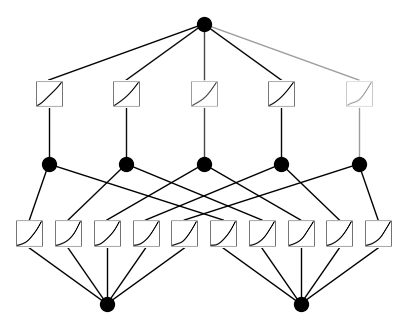

In [4]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

Train KAN with sparsity regularization

In [5]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.22e-01 | test loss: 1.27e-01 | reg: 2.71e+01 : 100%|██| 20/20 [00:08<00:00,  2.23it/s]


Plot trained KAN

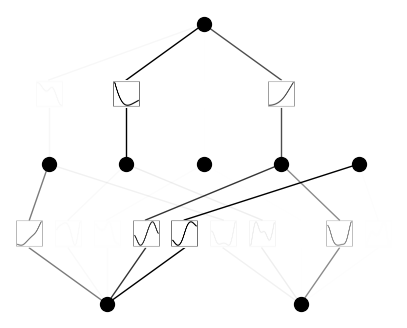

In [6]:
model.plot()

Prune KAN and replot (keep the original shape)

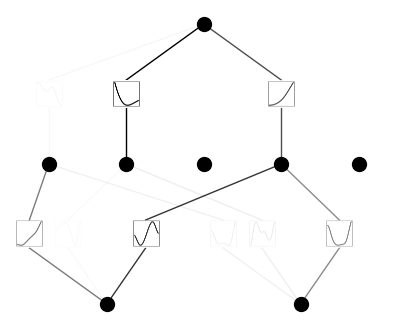

In [7]:
model.prune()
model.plot(mask=True)

Prune KAN and replot (get a smaller shape)

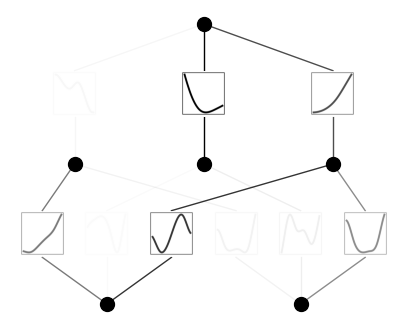

In [8]:
model = model.prune()
model(dataset['train_input'])
model.plot()

Continue training and replot

In [9]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 3.51e-03 | test loss: 3.76e-03 | reg: 8.79e+00 : 100%|██| 50/50 [00:17<00:00,  2.92it/s]


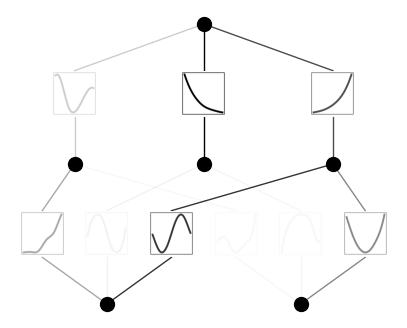

In [10]:
model.plot()

Automatically or manually set activation functions to be symbolic

In [11]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9916073679924011
fixing (0,0,1) with sin, r2=0.9956283569335938
fixing (0,0,2) with sin, r2=0.9998546242713928
fixing (0,1,0) with abs, r2=0.7946253418922424
fixing (0,1,1) with x^2, r2=0.9780170917510986
fixing (0,1,2) with x^2, r2=0.9992168545722961
fixing (1,0,0) with sin, r2=0.9747846722602844
fixing (1,1,0) with tanh, r2=0.9996949434280396
fixing (1,2,0) with exp, r2=0.999965488910675


Continue training to almost machine precision

In [12]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 3.16e-04 | test loss: 3.38e-04 | reg: 1.04e+01 : 100%|██| 50/50 [00:14<00:00,  3.44it/s]


Obtain the symbolic formula

In [13]:
model.symbolic_formula()[0][0]

0.93*exp(1.01*x_2**2 - 1.01*sin(3.14*x_1 - 9.42)) - 12.26*tanh(-0.42*x_2**2 + 0.37*sin(3.17*x_1 - 3.19) + 2.92) + 12.26